In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
import numpy as np

plt.style.use('fivethirtyeight')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [124]:
# open the tsv file
#data=pd.read_csv('download.tsv', sep='\t')

# save as csv
#data.to_csv('download.csv', index=False)

#This was only needed once to convert the tsv to csv

# EDA

In [125]:
data=pd.read_csv('download.csv')

data['datetime'] = pd.to_datetime(data['datetime'])

print(data.head())

  agency_cd       id            datetime timezone  discharge  \
0      USGS  8393610 2007-12-15 00:00:00      MST       6.18   
1      USGS  8393610 2007-12-15 00:15:00      MST       6.18   
2      USGS  8393610 2007-12-15 00:30:00      MST       6.17   
3      USGS  8393610 2007-12-15 00:45:00      MST       6.17   
4      USGS  8393610 2007-12-15 01:00:00      MST       6.17   

  discharge_quality  gage_height gage_height_quality  
0                 A         18.4                   A  
1                 A         18.4                   A  
2                 A         17.6                   A  
3                 A         17.6                   A  
4                 A         17.6                   A  


<Axes: xlabel='datetime'>

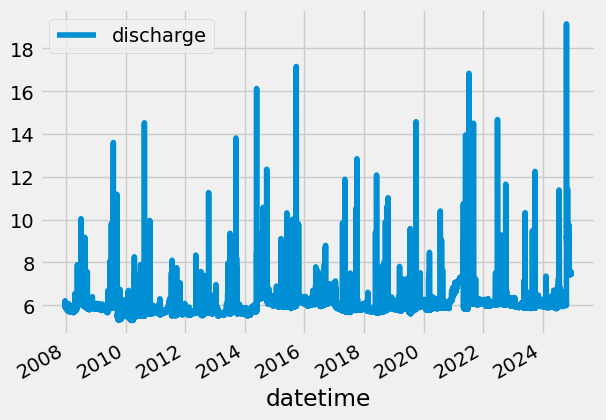

In [126]:
data.plot(x='datetime', y='discharge')

In [127]:
data['year']=data['datetime'].dt.year

data.head()

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year
0,USGS,8393610,2007-12-15 00:00:00,MST,6.18,A,18.4,A,2007
1,USGS,8393610,2007-12-15 00:15:00,MST,6.18,A,18.4,A,2007
2,USGS,8393610,2007-12-15 00:30:00,MST,6.17,A,17.6,A,2007
3,USGS,8393610,2007-12-15 00:45:00,MST,6.17,A,17.6,A,2007
4,USGS,8393610,2007-12-15 01:00:00,MST,6.17,A,17.6,A,2007


In [128]:
data.groupby(['year']).mean(numeric_only=True)

,id,discharge,gage_height
year,,,
2007,8393610.0,5.993364,10.010049
2008,8393610.0,6.009401,11.217825
2009,8393610.0,5.834626,4.893971
2010,8393610.0,5.718499,12.432839
2011,8393610.0,5.704205,4.640153
2012,8393610.0,5.721392,3.706222
2013,8393610.0,5.763560,10.319909
2014,8393610.0,6.095454,6.434616
2015,8393610.0,6.096765,6.146795


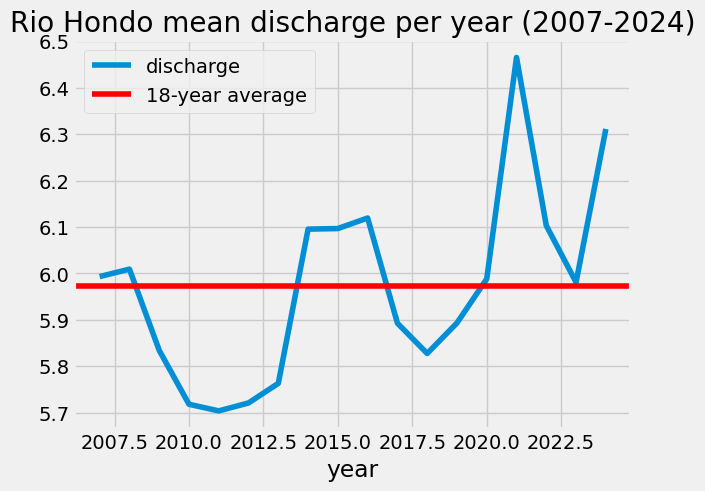

In [129]:
means = data.groupby(['year']).mean(numeric_only=True)
mean_discharge = means['discharge']
overall_mean = mean_discharge.mean()
mean_discharge.plot()
plt.axhline(y=overall_mean, color='red', label='18-year average')
plt.title("Rio Hondo mean discharge per year (2007-2024)")
plt.plot(2024, mean_discharge[2024])
plt.legend()

In [130]:
data['year']

0         2007
1         2007
2         2007
3         2007
4         2007
          ... 
593159    2024
593160    2024
593161    2024
593162    2024
593163    2024
Name: year, Length: 593164, dtype: int32

In [131]:
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['day_of_year'] = data['datetime'].dt.dayofyear

In [132]:
year_2021 = data[data['year'] == 2021]
year_2022 = data[data['year'] == 2022]
year_2023 = data[data['year'] == 2023]
year_2024 = data[data['year'] == 2024]

In [133]:
year_2021

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year,month,day,day_of_year
456312,USGS,8393610,2021-01-01 00:00:00,MST,6.69,A,6.34,A,2021,1,1,1
456313,USGS,8393610,2021-01-01 00:15:00,MST,6.69,A,6.34,A,2021,1,1,1
456314,USGS,8393610,2021-01-01 00:30:00,MST,6.67,A,5.96,A,2021,1,1,1
456315,USGS,8393610,2021-01-01 00:45:00,MST,6.66,A,5.78,A,2021,1,1,1
456316,USGS,8393610,2021-01-01 01:00:00,MST,6.65,A,5.60,A,2021,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
490643,USGS,8393610,2021-12-31 22:45:00,MST,6.20,A,6.41,A,2021,12,31,365
490644,USGS,8393610,2021-12-31 23:00:00,MST,6.20,A,6.41,A,2021,12,31,365
490645,USGS,8393610,2021-12-31 23:15:00,MST,6.20,A,6.41,A,2021,12,31,365
490646,USGS,8393610,2021-12-31 23:30:00,MST,6.20,A,6.41,A,2021,12,31,365


In [134]:
gage_height_2021 = year_2021[['day_of_year', 'gage_height']]
gage_height_2022 = year_2022[['day_of_year', 'gage_height']]
gage_height_2023 = year_2023[['day_of_year', 'gage_height']]
gage_height_2024 = year_2024[['day_of_year', 'gage_height']]

In [135]:
discharge_2021 = year_2021[['day_of_year', 'discharge']]
discharge_2022 = year_2022[['day_of_year', 'discharge']]
discharge_2023 = year_2023[['day_of_year', 'discharge']]
discharge_3_year = discharge_2021.merge(discharge_2022, on='day_of_year').merge(discharge_2023, on='day_of_year')
discharge_3_year.columns = ['day_of_year', 'discharge_2021', 'discharge_2022', 'discharge_2023']

Text(0.5, 0, 'Day of the year')

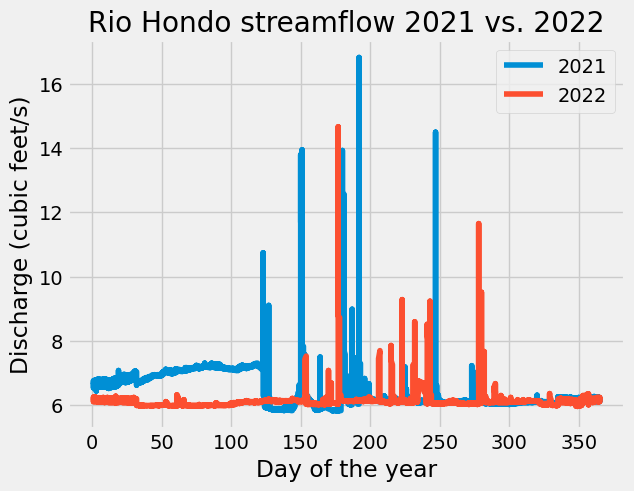

In [136]:
fig, ax = plt.subplots()
ax.plot(discharge_2021['day_of_year'], discharge_2021['discharge'], label='2021')
ax.plot(discharge_2022['day_of_year'], discharge_2022['discharge'], label='2022')
plt.legend()
plt.title('Rio Hondo streamflow 2021 vs. 2022')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Day of the year')

Text(0.5, 0, 'Day of the year')

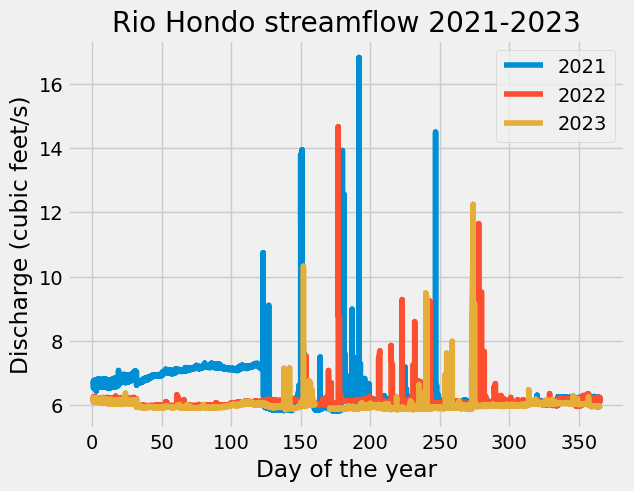

In [137]:
fig, ax = plt.subplots()
ax.plot(discharge_2021['day_of_year'], discharge_2021['discharge'], label='2021')
ax.plot(discharge_2022['day_of_year'], discharge_2022['discharge'], label='2022')
ax.plot(discharge_2023['day_of_year'], discharge_2023['discharge'], label='2023')
plt.legend()
plt.title('Rio Hondo streamflow 2021-2023')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Day of the year')

In [138]:
discharge=data['discharge'].to_frame()
discharge.index=data['datetime']

Text(0.5, 0, 'Date and Time(15 min intervals)')

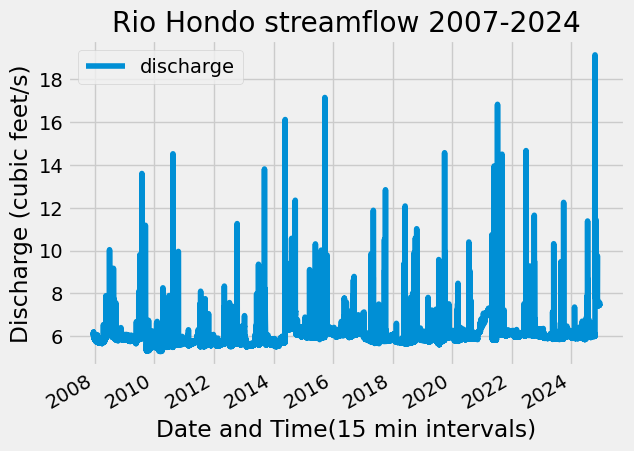

In [139]:

discharge.plot()
plt.title('Rio Hondo streamflow 2007-2024')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date and Time(15 min intervals)')

In [140]:
discharge_2008 = discharge[(discharge.index >= '2008-01-01') & (discharge.index < '2009-01-01')]
discharge_2014 = discharge[(discharge.index >= '2014-01-01') & (discharge.index < '2015-01-01')]
discharge_2020 = discharge[(discharge.index >= '2020-01-01') & (discharge.index < '2021-01-01')]

Text(0.5, 0, 'Date')

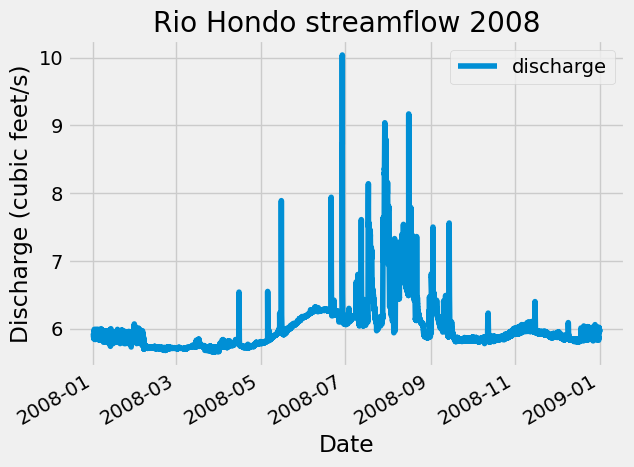

In [141]:
discharge_2008.plot()
plt.title('Rio Hondo streamflow 2008')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

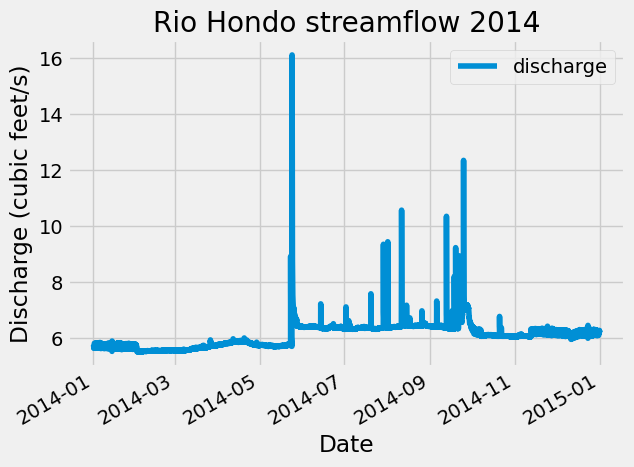

In [142]:
discharge_2014.plot()
plt.title('Rio Hondo streamflow 2014')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

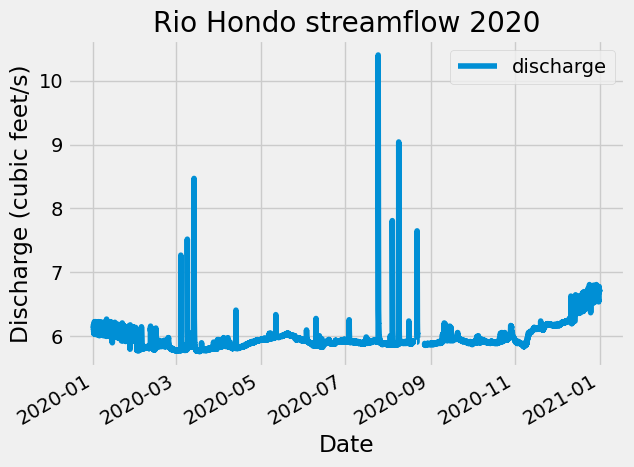

In [143]:
discharge_2020.plot()
plt.title('Rio Hondo streamflow 2020')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

In [144]:
discharge['day_of_year']=discharge.index.day_of_year
discharge['week']=discharge.index.isocalendar().week.astype('int32')
discharge['month']=discharge.index.month
discharge['quarter']=discharge.index.quarter
discharge['year']=discharge.index.year

In [145]:
discharge_consolidated = discharge.copy()
discharge_consolidated = discharge_consolidated.groupby(['year', 'day_of_year']).first()

([<matplotlib.axis.XTick at 0x74842f923290>,
 [Text(0, 0, '1'),
  Text(5, 0, '6'),
  Text(10, 0, '11'),
  Text(15, 0, '16'),
  Text(20, 0, '21'),
  Text(25, 0, '26'),
  Text(30, 0, '31'),
  Text(35, 0, '36'),
  Text(40, 0, '41'),
  Text(45, 0, '46'),
  Text(50, 0, '51')])

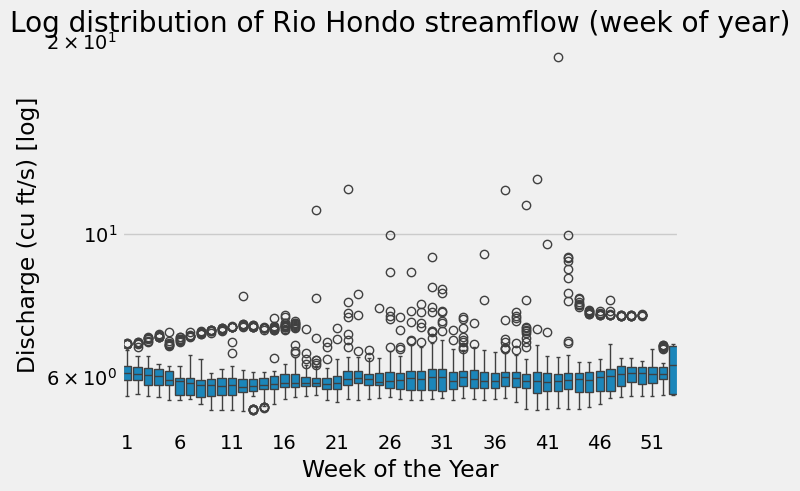

In [146]:
sns.boxplot(data=discharge_consolidated, x='week', y='discharge')
plt.ylabel('Discharge (cu ft/s) [log]')
plt.xlabel('Week of the Year')
plt.yscale('log')
plt.title('Log distribution of Rio Hondo streamflow (week of year)')

plt.xticks(range(0, 53, 5))

Text(0.5, 1.0, 'Log distribution of Rio Hondo streamflow (month of year)')

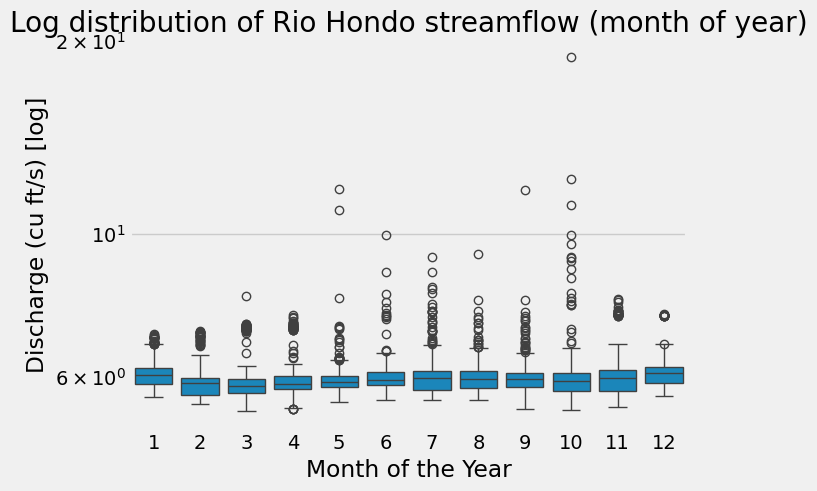

In [147]:
sns.boxplot(data=discharge_consolidated,x='month', y='discharge')
plt.ylabel('Discharge (cu ft/s) [log]')
plt.xlabel('Month of the Year')
plt.yscale('log')
plt.title('Log distribution of Rio Hondo streamflow (month of year)')

# Prediction

In [148]:
train = discharge[discharge['year']<2023]
test = discharge[discharge['year']>=2023]

Text(0, 0.5, 'Discharge (cu ft/s)')

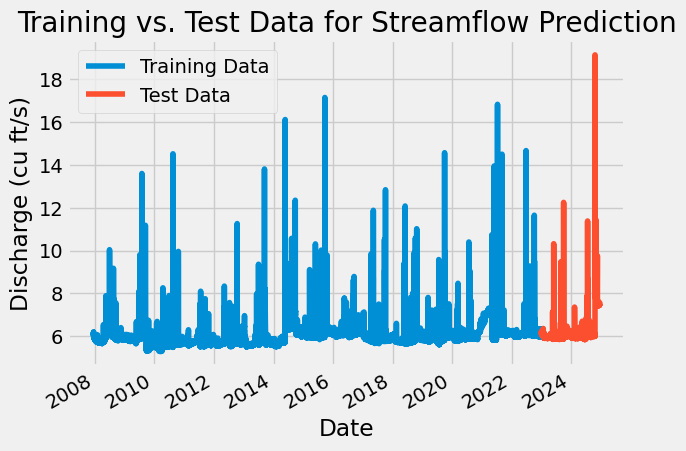

In [149]:
fig, ax = plt.subplots()
train['discharge'].plot(ax=ax)
test['discharge'].plot(ax=ax)
plt.legend(['Training Data', 'Test Data'])
plt.title('Training vs. Test Data for Streamflow Prediction')
plt.xlabel('Date')
plt.ylabel('Discharge (cu ft/s)')

In [150]:
features = ['month','week', 'day_of_year']
target = 'discharge'

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [152]:
# Remove NaN values from y_train and y_test
y_train = y_train.dropna()
y_test = y_test.dropna()

# Ensure x_train and x_test match the indices of y_train and y_test
x_train = x_train.loc[y_train.index]
x_test = x_test.loc[y_test.index]

regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=100)
eval_set = [(x_train, y_train), (x_test, y_test)]
regressor.fit(x_train, y_train, eval_set=eval_set, verbose=20)

[0]	validation_0-rmse:0.37131	validation_1-rmse:0.69559
[20]	validation_0-rmse:0.36126	validation_1-rmse:0.70170
[40]	validation_0-rmse:0.36029	validation_1-rmse:0.70288
[60]	validation_0-rmse:0.36004	validation_1-rmse:0.70354
[80]	validation_0-rmse:0.35994	validation_1-rmse:0.70366
[99]	validation_0-rmse:0.35990	validation_1-rmse:0.70379


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
pd.set_option('mode.chained_assignment', None)

# Reindex x_test to match the index of test
x_test_reindexed = x_test.reindex(test.index)

# Make predictions
test['prediction'] = regressor.predict(x_test_reindexed)

Text(0.5, 1.0, 'Feature Importance')

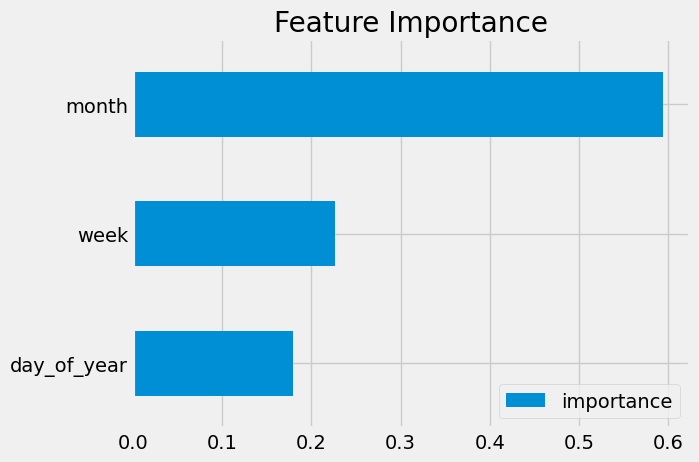

In [154]:
importance = pd.DataFrame(data=regressor.feature_importances_, index=regressor.feature_names_in_,
            columns=['importance'])
importance = importance.sort_values('importance')
importance.plot.barh()
plt.title('Feature Importance')

Text(0.5, 1.0, 'Model vs. 2023 Discharge Data')

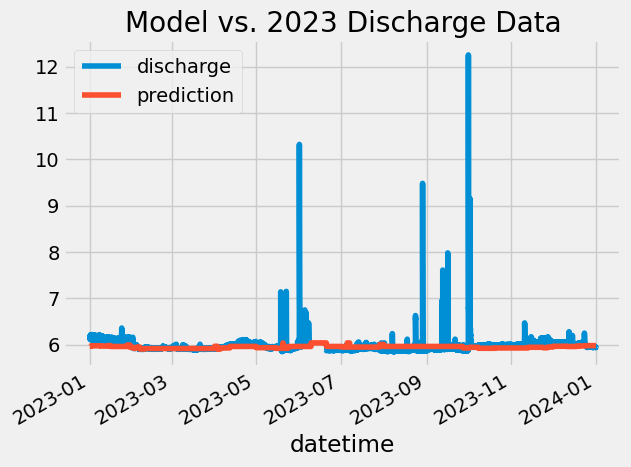

In [155]:
predicted_2023 = test[test['year'] == 2023]
predicted_2023.plot(y=['discharge', 'prediction'])
plt.title('Model vs. 2023 Discharge Data')

Text(0.5, 1.0, 'Model vs. 2024 Discharge Data')

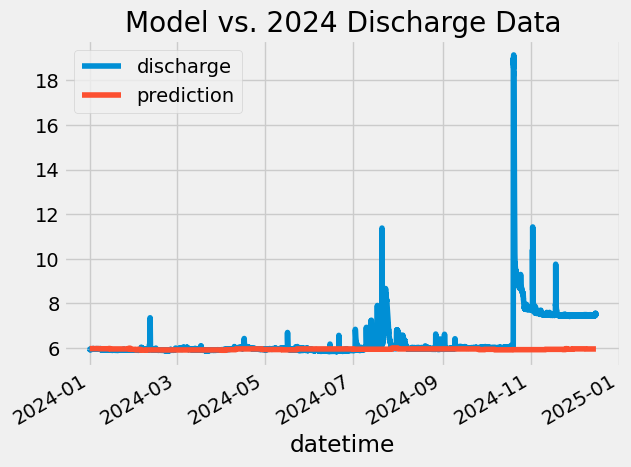

In [156]:
predicted_2024 = test[test['year'] == 2024]
predicted_2024.plot(y=['discharge', 'prediction'])
plt.title('Model vs. 2024 Discharge Data')